In [1]:
import seaborn as sns
import numpy as np
import scipy
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
%pylab inline
import os
from __future__ import print_function
from __future__ import division
import os, sys
# hook up all scripts
sys.path.append(os.path.abspath('../scripts')) # if notebook in folder
sys.path.append(os.path.abspath('./scripts')) #if in root
sys.path.append(os.path.abspath('./releases/release_v02/')) #for current preprocessing
%load_ext autoreload
# %autoreload 2 # changes in script will be immediately applied

import preprocessing_all_data_v02_3 as pts


os.chdir(pts.working_dir() + 'Feature_releases/release_v02')

Populating the interactive namespace from numpy and matplotlib


# Пример вызова генерации фич

In [2]:
reload(pts)
pts.SPLITS = [['Producto_ID', 'Cliente_ID', 'Ruta_SAK'],
          ['Producto_ID', 'Cliente_ID', 'Agencia_ID'],
             ['Producto_ID', 'Ruta_SAK'], 
          ['brand', 'Cliente_ID', 'Ruta_SAK', 'Agencia_ID']]

data = pts.preproc(states=['Queretaro de Arteaga'])
data.head()

1 lag done
2 lag done
3 lag done
3-wide lag done
4-wide lag done


,Agencia_ID,Canal_ID,Cliente_ID,Demanda_uni_equil,Dev_proxima,Dev_proxima_by_uni,Log_Demanda,Log_Demanda_Mean_Producto_ID_Cliente_ID_Agencia_ID,Log_Demanda_Mean_Producto_ID_Cliente_ID_Ruta_SAK,Log_Dev_proxima,...,Log_Demanda_Mean_Producto_ID_Cliente_ID_Agencia_ID_4last,Log_Demanda_Mean_Producto_ID_Cliente_ID_Ruta_SAK_4last,Log_Dev_proxima_4last,Log_Venta_hoy_4last,No_remains_4last,No_remains_Mean_Producto_ID_Cliente_ID_Agencia_ID_4last,No_remains_Mean_Producto_ID_Cliente_ID_Ruta_SAK_4last,Venta_hoy_4last,Venta_hoy_by_uni_4last,Venta_uni_hoy_4last
0,1210,5,653039,395.0,0.00,NaN,5.981414,5.712620,6.255725,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1210,5,653039,575.0,64.82,9.26,6.356108,6.137538,6.605798,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1210,5,653039,223.0,0.00,NaN,5.411646,3.830277,5.193466,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1210,5,653039,40.0,0.00,NaN,3.713572,4.586806,4.949039,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1210,5,653039,182.0,0.00,NaN,5.209486,5.206432,5.203316,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
cur_week_feat = [u'Town', u'State', u'Venta_uni_hoy', u'Venta_hoy', u'Dev_uni_proxima',
       u'Dev_proxima', u'Demanda_uni_equil', u'Dev_proxima_by_uni', u'No_remains', 
        u'Venta_hoy_by_uni', u'Ordered', 'Log_Dev_proxima', 'Log_Dev_uni_proxima', 'Log_Venta_hoy']
cur_week_feat = [x for x in cur_week_feat if x in data.columns]


means_by_split = [x for x in data.columns if 'Mean' in x and not(x[-2] == '_' or x[-4:] == 'last')] #its mean, its not a lag
print(means_by_split)
data_for_model = data.drop(cur_week_feat + means_by_split, axis=1).set_index(u'Semana')

X_train = data_for_model.loc[3:7,:].drop('Log_Demanda', axis=1)
y_train = data_for_model.loc[3:7,:]['Log_Demanda']
X_test = data_for_model.loc[8:9,:].drop('Log_Demanda', axis=1)
y_test = data_for_model.loc[8:9,:]['Log_Demanda']
X_train.head()

['Log_Demanda_Mean_Producto_ID_Cliente_ID_Agencia_ID', 'Log_Demanda_Mean_Producto_ID_Cliente_ID_Ruta_SAK', 'No_remains_Mean_Producto_ID_Cliente_ID_Agencia_ID', 'No_remains_Mean_Producto_ID_Cliente_ID_Ruta_SAK']


,Agencia_ID,Canal_ID,Cliente_ID,Producto_ID,Ruta_SAK,brand,pieces,weight,Demanda_uni_equil_1,Dev_proxima_1,...,Log_Demanda_Mean_Producto_ID_Cliente_ID_Agencia_ID_4last,Log_Demanda_Mean_Producto_ID_Cliente_ID_Ruta_SAK_4last,Log_Dev_proxima_4last,Log_Venta_hoy_4last,No_remains_4last,No_remains_Mean_Producto_ID_Cliente_ID_Agencia_ID_4last,No_remains_Mean_Producto_ID_Cliente_ID_Ruta_SAK_4last,Venta_hoy_4last,Venta_hoy_by_uni_4last,Venta_uni_hoy_4last
Semana,,,,,,,,,,,,,,,,,,,,,
3,1210,5,653039,1240,3001,3.0,4.0,125.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1210,5,653039,1250,3001,3.0,4.0,105.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1210,5,653039,1644,3001,3.0,NaN,40.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1210,5,653039,2261,3001,2.0,NaN,58.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1210,5,653039,4280,3001,39.0,NaN,110.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## xgboost

In [4]:
import xgboost as xgb
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import mean_squared_error

# param = clf.best_params_
param = {
 'learning_rate': 0.3,
 'gamma': 1,
 'max_depth': 16,
 'min_child_weight': 18,
 'n_estimators': 50,
 'subsample': 0.8,
 'colsample_bytree': 0.8
}

xgb_model = xgb.XGBRegressor()
xgb_model.set_params(**param)
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.8,
       gamma=1, learning_rate=0.3, max_delta_step=0, max_depth=16,
       min_child_weight=18, missing=None, n_estimators=100, nthread=-1,
       objective='reg:linear', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=0.8)

Train: 0.346125736538
Test: 0.366784271628


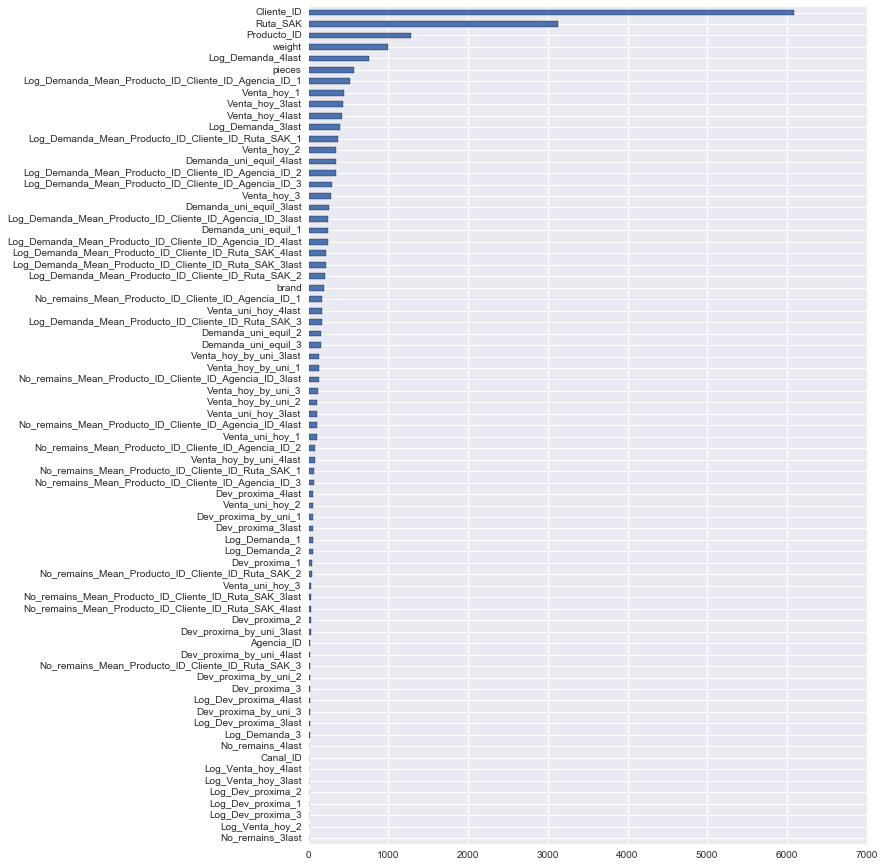

In [5]:
feat_imp = pd.Series(xgb_model.booster().get_fscore()).sort_values()
feat_imp.head(100).plot.barh(figsize=(10,15))

print('Train:', np.sqrt(mean_squared_error(y_train, xgb_model.predict(X_train))))
print('Test:', np.sqrt(mean_squared_error(y_test, xgb_model.predict(X_test))))

In [6]:
feat_imp.sort_values(ascending=False).to_csv('Splits_feature_importancies.csv')